In [4]:
import cv2
import pandas as pd
import time
import deepface
from deepface import DeepFace
import mediapipe
# import dlib
import matplotlib.pyplot as plt
import imagehash
import time

In [34]:
pip install ImageHash

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv('emotion.csv')

### FPS record for input video

In [26]:
cap = cv2.VideoCapture("demos4.mp4")
prev_frame_time = 0
new_frame_time = 0
font=cv2.FONT_HERSHEY_SIMPLEX
while(True):
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.resize(frame, (500, 300))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    cv2.putText(frame,fps,(7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
    cv2.imshow('frame',frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Facial analysis in demo

In [ ]:
cap = cv2.VideoCapture(0)
# df.drop('Unnamed: 0',axis=1,inplace=True)
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

prev_frame_time = 0
  
# used to record the time at which we processed current frame
new_frame_time = 0

start_time = time.time()                             
while(True):

    ret,frame = cap.read()
    if not ret:
        break
#     gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray,1.2,5)

#     for (x,y,w,h) in faces:
#         rec=cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
#         cv2.imshow('frame',rec)
       
#     start_time = time.time()
    emotion=' '
    seconds = 0
    current_time = time.ctime()
    c_time = time.time()
    elapsed_time = c_time - start_time
#     start_time=c_time
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if int(elapsed_time)>=seconds:
#         DeepFace.stream(db_path = r"C:\Users\karnb\.deepface\weights")
        result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False,detector_backend=backends[5])
        emotion = result[0]['dominant_emotion']
        percentage=result[0]['emotion'][emotion]
        percentagestr=str(percentage)
        time1=current_time.split(' ')[-2]
        start_time=c_time
              
        for dicts in result:
            x, y, w, h = dicts['region']['x'], dicts['region']['y'], dicts['region']['w'], dicts['region']['h']
            emotion = dicts['dominant_emotion']
            txt = str(emotion+':')
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
#             cv2.imshow('frame',rec)
            df1 = pd.DataFrame({"Emotion":txt,"Time elapsed": time1,"Percentage":percentage}, index=[1])
            df = df.append(df1)
#             start_time = time.time()
#             cv2.putText(frame,txt,(240,620),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
#             cv2.putText(frame,percentagestr,(300,620),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
#             cv2.putText(frame, fps, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
            cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
        
        

In [ ]:
# HERE I'LL MAKE A FUNCTION THAT WILL DETECT THE EMOTION AND MAKE THIS FUNCTION EXECUTABLE AFTER N SECONDS
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]
def emotionrecog(frame,df):
    current_time = time.ctime()
    c_time = time.time()
    result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False,detector_backend=backends[5])
    emotion = result[0]['dominant_emotion']
    percentage=result[0]['emotion'][emotion]
    percentagestr=str(percentage)
    time1=current_time.split(' ')[-2]
      
              
    for dicts in result:
        x, y, w, h = dicts['region']['x'], dicts['region']['y'], dicts['region']['w'], dicts['region']['h']
        emotion = dicts['dominant_emotion']
        txt = str(emotion+':')
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
#             cv2.imshow('frame',rec)
        df1 = pd.DataFrame({"Emotion":txt,"Time elapsed": time1,"Percentage":percentage}, index=[1])
        df = df.append(df1)
        
        cv2.putText(frame,txt,(240,620),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
        cv2.putText(frame,percentagestr,(300,620),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
        cv2.imshow('frame',frame)


cap = cv2.VideoCapture(0)
while(True):

    ret,frame = cap.read()
    if not ret:
        break
    starttime = time.time()
    while True:
        # Remove the Time taken by code to execute
        time.sleep(2 - ((time.time() - starttime) % 2))
        emotionrecog(frame,df)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()       
        

In [2]:
result[0]['emotion'][emotion]

NameError: name 'result' is not defined

In [3]:
x,y,w,h

NameError: name 'x' is not defined

In [79]:
frame.shape

(480, 640, 3)

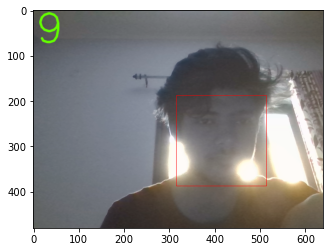

In [80]:
plt.imshow(frame)


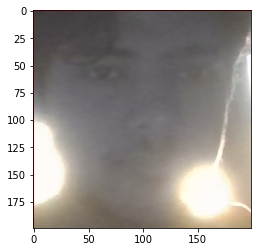

In [81]:

face1=frame[y:y+h,x:x+w,:]
plt.imshow(face1)


In [82]:
cv2.imwrite('face1.jpg',face1)

True

In [83]:
from PIL import Image
hash1=imagehash.average_hash(Image.open('face1.jpg'))

In [84]:
print(hash1)

00010181c3c7cf87


In [85]:
face1.shape

(199, 199, 3)

In [33]:
# # FACE RECOGNITION USING EMBEDDINGS
# models = [
#   "VGG-Face", 
#   "Facenet", 
#   "Facenet512", 
#   "OpenFace", 
#   "DeepFace", 
#   "DeepID", 
#   "ArcFace", 
#   "Dlib", 
#   "SFace",
# ]
# embedding_objs = DeepFace.represent(img_path = face1, enforce_detection=False ,
#       model_name = models[2]
# )

In [12]:
# embedding_objs

[{'embedding': [0.2167036235332489,
   -0.3117501139640808,
   -0.8763772249221802,
   0.4777146577835083,
   0.0535074807703495,
   0.5118387341499329,
   -0.6625646352767944,
   0.38338595628738403,
   -0.1730426698923111,
   0.43159282207489014,
   0.4873855710029602,
   0.8055617213249207,
   0.1607484668493271,
   -0.5511505007743835,
   0.040710799396038055,
   -0.6466538906097412,
   0.33313795924186707,
   0.6387110352516174,
   0.07565252482891083,
   -0.46149247884750366,
   -0.7285188436508179,
   0.37811562418937683,
   0.9010920524597168,
   -0.830218493938446,
   -0.34114813804626465,
   -0.0716271698474884,
   0.12873323261737823,
   -0.0005185138434171677,
   -0.269540011882782,
   -0.06378726661205292,
   -0.18179087340831757,
   0.19354556500911713,
   -0.0015590135008096695,
   -0.06730195879936218,
   -0.094168521463871,
   -0.0017765467055141926,
   -0.008268646895885468,
   -0.22532373666763306,
   -0.7328984141349792,
   0.2787873446941376,
   -0.2009580731391906

In [86]:
result

[{'emotion': {'angry': 0.0002022533167203194,
   'disgust': 2.6831763874044383e-14,
   'fear': 0.0021087987293827,
   'happy': 99.2065132610186,
   'sad': 0.0025709407627997755,
   'surprise': 8.498547127672674e-05,
   'neutral': 0.7885192512250839},
  'dominant_emotion': 'happy',
  'region': {'x': 316, 'y': 188, 'w': 199, 'h': 199}}]

In [68]:
type(frame)

numpy.ndarray

In [69]:
frame.shape

(480, 640, 3)

In [70]:
len(result)

1

In [87]:
for emo in result:
    print(result[0]['dominant_emotion'])

happy


In [88]:
df

,Emotion,Time elapsed,Percentage
1,angry,22:07:59,NaN
1,fear,22:08:08,NaN
1,neutral,22:08:10,NaN
1,fear,22:08:12,NaN
1,fear,22:08:13,NaN
...,...,...,...
1,neutral:,11:54:10,99.593598
1,happy:,11:54:10,99.994493
1,happy:,11:54:11,98.850012
1,happy:,11:54:11,98.850012


In [73]:
current_time

'Sun May 14 11:50:11 2023'

In [74]:
type(start_time)

float

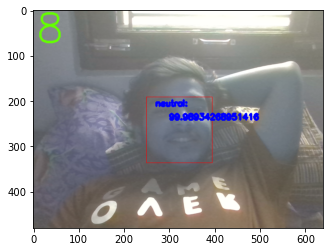

In [75]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [13]:
# cv2.imwrite('abcd.jpg', frame)

True

In [21]:
# ab = cv2.imread('abcd.jpg')
# res = DeepFace.analyze(img_path = ab , actions=['emotion'], enforce_detection=False,detector_backend=backends[3])

1/1 [==============================] - 0s 284ms/step


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]
